<a href="https://colab.research.google.com/github/ArVos89/Arsham-DataScience/blob/main/Important%20Demographic%20Factors%20in%20English%20Aquasation%20As%20Second%20Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
yesimport matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sqlalchemy import create_engine
pd.set_option('display.max_columns', 128)
pd.set_option('display.max_rows', 484)
# Display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

from sqlalchemy import create_engine
import seaborn as sns 
sns.set()

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

from scipy.stats import boxcox
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action="ignore")

# df3=pd.read_csv(r'C:\Users\arsha\OneDrive\Documents\Python Scripts\lang dataset\data.csv')

from google.colab import files
# uploaded = files.upload()

df3= pd.read_csv('/content/data.csv' ) 


In [ ]:
df33=df3.copy()

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import io
# df3 = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

max_abs_scaler = preprocessing.MaxAbsScaler()
df3['elogitM'] = max_abs_scaler.fit_transform(df3['elogit'].values.reshape(-1,1))

df3['elogit'].nunique()

77

In [ ]:
df33.shape

(669498, 128)

In [ ]:
from scipy.stats import norm

df3['elogitC'] = pd.DataFrame(data=norm.rvs(loc=500, scale=50, size=100),
                  columns=['elogit'])

In [ ]:
df3['Eng_start'].isnull().sum()

0

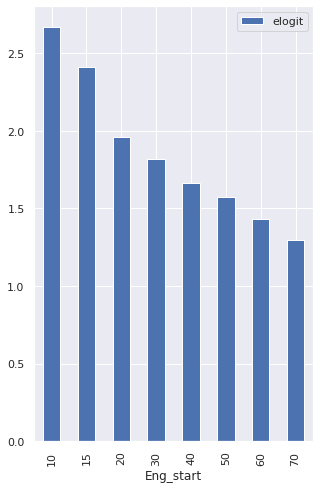

10    191970
15     70106
20      9104
30      3484
40       780
50       222
60        53
70        10
Name: Eng_start, dtype: int64

In [ ]:
df33['Eng_start']=pd.cut(df33.Eng_start,bins=[0,10,15,20,30,40,50,60,70],labels=[10,15,20,30,40,50,60,70])
startbar=df33.groupby('Eng_start')['elogit'].mean().reset_index()
startbar.plot(x="Eng_start", y=["elogit"], kind="bar",figsize=(5,8))
plt.show()
df33['Eng_start'].value_counts()

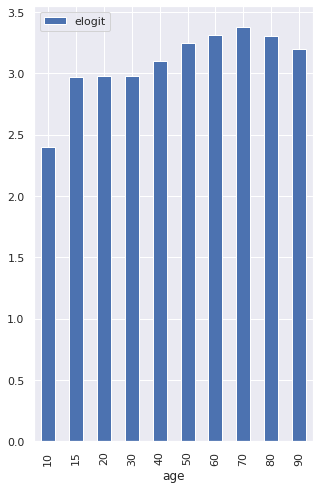

30    262288
40    108598
20     87682
50     47653
60     24609
70     11138
15      8374
80      1914
90       227
10       160
Name: age, dtype: int64

In [ ]:
df33['age']=pd.cut(df33.age,bins=[0,10,15,20,30,40,50,60,70,80,90],labels=[10,15,20,30,40,50,60,70,80,90])
agebar=df33.groupby('age')['elogit'].mean().reset_index()
agebar.plot(x="age", y=["elogit"], kind="bar",figsize=(5,8))
plt.show()
df33['age'].value_counts()

In [ ]:
# df3['natlangs'] = df3['natlangs'].fillna('')

df33.dropna(subset=['natlangs'],inplace=True)
df33.dropna(subset=['Eng_little'],inplace=True)
df33.dropna(subset=['Eng_start'],inplace=True)


In [ ]:
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*English.*$)', 'English')
df33['primelangs'] = df33.primelangs.str.replace(r'(^.*Chinese.*$)', 'Chinese')


df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Croatian.*$)', 'Serb-Cro-Bos')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Bosnian.*$)', 'Serb-Cro-Bos')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Serbian.*$)', 'Serb-Cro-Bos')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Slovene.*$)', 'Serb-Cro-Bos')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Macedonian.*$)', 'Serb-Cro-Bos')


df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Russian.*$)', 'Rus-Bel-Ukr')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Belarussian.*$)', 'Rus-Bel-Ukr')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Ukrainian.*$)', 'Rus-Bel-Ukr')

df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Portuguese.*$)', 'Sp-Por')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Spanish.*$)', 'Sp-Por')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Catalan.*$)', 'Sp-Por')

df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Azeri.*$)', 'Turk_Az')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.* Turkish.*$)', 'Turk_Az')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Turkish.*$)', 'Turk_Az')

df3['primelangs'] = df3.primelangs.str.replace(r'(^.*German.*$)', 'Ger_Dut')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Dutch.*$)', 'Ger_Dut')

df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Swedish.*$)', 'Scand')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Danish.*$)', 'Scand')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Norwegian.*$)', 'Scand')

df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Czech.*$)', 'Cz-Slov')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Slovak.*$)', 'Cz-Slov')

df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Malay.*$)', 'Indo-Mal')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Indonesian.*$)', 'Indo-Mal')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Malayan.*$)', 'Indo-Mal')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Malaysian.*$)', 'Indo-Mal')



df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Urdu.*$)', 'Hindi-Urdu')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Hindi.*$)', 'Hindi-Urdu')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Punjabi.*$)', 'Hindi-Urdu')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Gujarati.*$)', 'Hindi-Urdu')



df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Dari.*$)', 'Farsi')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Tajik.*$)', 'Farsi')
df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Tadjik.*$)', 'Farsi')


df3['primelangs'] = df3.primelangs.str.replace(r'(^.*Romanian.*$)', 'Romanian')

df3['primelangs'] = df3.primelangs.str.replace(r'(^.*French.*$)', 'French')


In [ ]:
df33 = df33.drop(df33[df33['gender'] == 'other'].index)


In [ ]:
df33.shape

(662797, 128)

In [ ]:
# df3.groupby('natlangs').filter(lambda x : len(x)>9)

In [ ]:
# Get the count of each value value_counts = df3['natlangs'].value_counts() # Select the values where the count is less than 9 (or 10 if you like) to_remove = value_counts[value_counts <= 9].index # Keep rows where the natlangs column is not in to_remove df3 = df3[~df3.natlangs.isin(to_remove)]

value_counts = df33['natlangs'].value_counts()

to_remove = value_counts[value_counts <= 200].index

to_remove_df3 = df33[~df33.natlangs.isin(to_remove)]




In [ ]:
value_counts_2 = df33['primelangs'].value_counts()

to_remove_2 = value_counts_2[value_counts_2 <= 125].index

to_remove_df3 = to_remove_df3[~df33.primelangs.isin(to_remove_2)]


value_counts_3 = df33['education'].value_counts()

to_remove_3 = value_counts_3[value_counts_3 <= 46].index

to_remove_df3 = to_remove_df3[~to_remove_df3.education.isin(to_remove_3)]


In [ ]:
to_remove_df3.shape

(608657, 128)

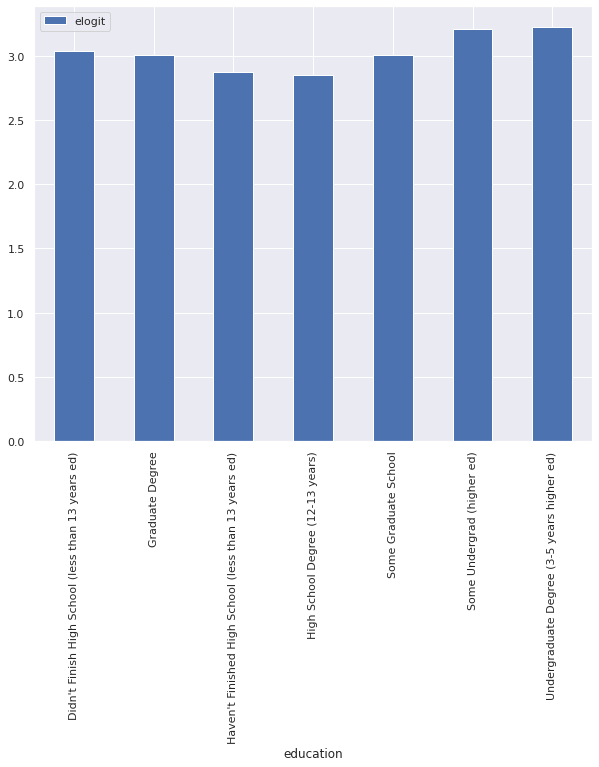

In [ ]:
edubar=to_remove_df3.groupby('education')['elogit'].mean().reset_index()
edubar.plot(x="education", y=["elogit"], kind="bar",figsize=(10,8))
plt.show()

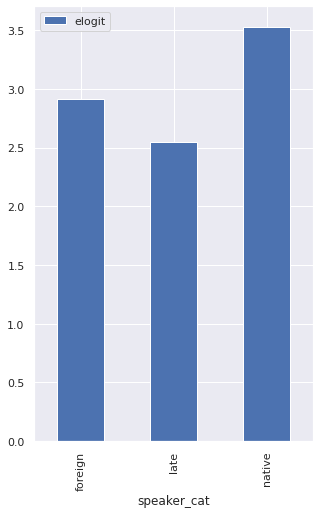

In [ ]:
scbar=to_remove_df3.groupby('speaker_cat')['elogit'].mean().reset_index()
scbar.plot(x="speaker_cat", y=["elogit"], kind="bar",figsize=(5,8))
plt.show()

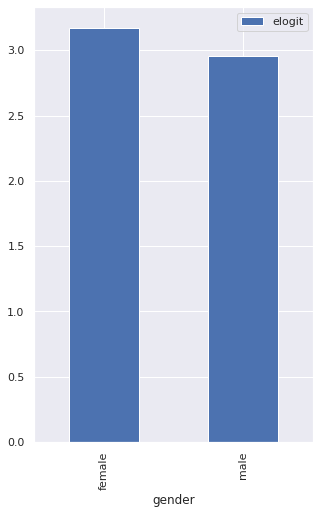

In [ ]:
genderbar=to_remove_df3.groupby('gender')['elogit'].mean().reset_index()
genderbar.plot(x="gender", y=["elogit"], kind="bar",figsize=(5,8))
plt.show()


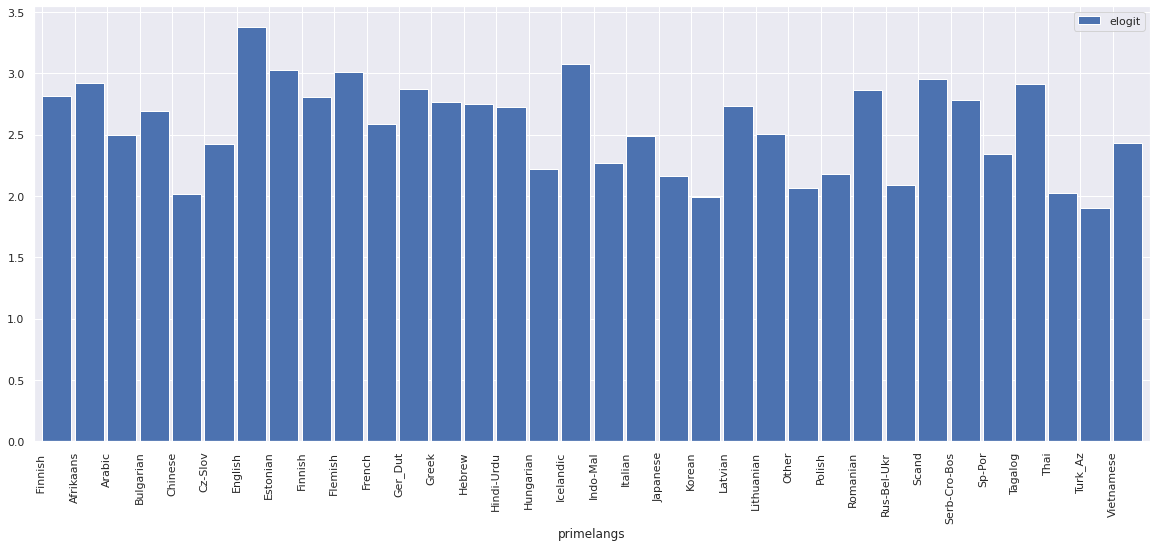

In [ ]:
# male_female=to_remove_df3.groupby('gender')['speaker_cat','elogit'].mean().reset_index()
# male_female.head()
primebar=to_remove_df3.groupby('primelangs')['elogit'].mean().reset_index()

primebar.plot(x="primelangs", y=["elogit"], kind="bar",figsize=(20,8), align='edge', width=0.9)
plt.show()

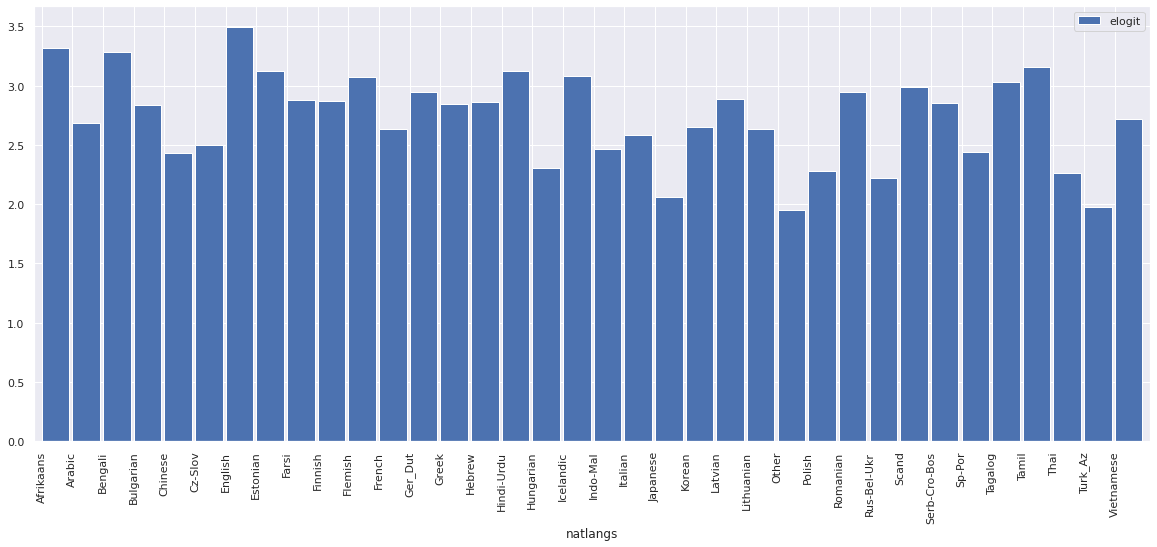

In [ ]:
# male_female=to_remove_df3.groupby('gender')['speaker_cat','elogit'].mean().reset_index()
# male_female.head()
barlang=to_remove_df3.groupby('natlangs')['elogit'].mean().reset_index()

barlang.plot(x="natlangs", y=["elogit"], kind="bar",figsize=(20,8), align='edge', width=0.9)
plt.show()

In [ ]:
c=to_remove_df3[['house_Eng','elogit','gender','Eng_start','speaker_cat','prime_Eng','nat_Eng','education','age']]
c['house_Eng'] = c['house_Eng'].fillna(0)
c['house_Eng'].unique()


array([0., 1.])

In [ ]:
y=c['elogit']
X=c[['gender','speaker_cat','prime_Eng','nat_Eng','age','house_Eng','Eng_start']]
v=pd.get_dummies(c[['speaker_cat','education']])
# m=pd.get_dummies(c['natlangs'])
g=pd.get_dummies(c['gender'], drop_first=True)

# df3.reset_index(drop=True, inplace=True)
# df3.reset_index(drop=True, inplace=True)
X = X.drop(['gender'], axis =1).merge(g,left_index=True, right_index=True)
X = X.drop(['speaker_cat'], axis =1).merge(v,left_index=True, right_index=True)
# X = X.drop(['natlangs'], axis =1).merge(m,left_index=True, right_index=True)
# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]
y.head(10)
# X=pd.concat([X, pd.get_dummies(c['gender'], drop_first=True)])

0   3.622
1   5.252
2   5.252
3   2.209
4   2.801
5   3.012
6   4.143
7   3.622
8   2.801
9   3.622
Name: elogit, dtype: float64

In [ ]:
X.shape

(608657, 16)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


# poly = PolynomialFeatures(degree=3, include_bias=True)
# X = poly.fit_transform(X)


lrm = linear_model.LinearRegression()

# Fit method estimates the coefficients using OLS
lrm.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 elogit   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                 1.362e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:10:56   Log-Likelihood:            -7.8822e+05
No. Observations:              608657   AIC:                         1.576e+06
Df Residuals:                  608642   BIC:                         1.577e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                              2.0042      0.003    636.507      0.000       1.998       2.010
prime_Eng                                                         -0.0007      0.027     -0.026      0.979      -0.054       0.053
nat_Eng                                                            0.1804      0.028      6.456      0.000       0.126       0.235
age                                                                0.0060      0.000     55.297      0.000       0.006       0.006
house_Eng                                                          0.2097      0.004     50.984      0.000       0.202       0.218
Eng_start                                                         -0.0440      0.000   -107.152      0.000      -0.045      -0.043
male                                                              -0.1373      0.002    -60.118      0.000      -0.142      -0.133
speaker_cat_foreign                                                0.6175      0.003    219.169      0.000       0.612       0.623
speaker_cat_late                                                   0.5278      0.003    154.178      0.000       0.521       0.535
speaker_cat_native                                                 0.8589      0.005    186.086      0.000       0.850       0.868
education_Didn't Finish High School (less than 13 years ed)        0.1883      0.010     19.430      0.000       0.169       0.207
education_Graduate Degree                                          0.3939      0.003    143.327      0.000       0.388       0.399
education_Haven't Finished High School (less than 13 years ed)     0.1101      0.006     19.791      0.000       0.099       0.121
education_High School Degree (12-13 years)                         0.2417      0.003     70.575      0.000       0.235       0.248
education_Some Graduate School                                     0.3219      0.004     80.584      0.000       0.314       0.330
education_Some Undergrad (higher ed)                               0.3409      0.003    105.785      0.000       0.335       0.347
education_Undergraduate Degree (3-5 years higher ed)               0.4073      0.003    149.739      0.000       0.402       0.413
==============================================================================
Omnibus:                    21147.311   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23473.604
Skew:                           0.467   Prob(JB):                         0.00
Kurtosis:                       3.233   Cond. No.                     1.91e+17
====================================================================

In [ ]:
from sklearn.linear_model import Lasso


lassoregr = Lasso(alpha=10**-20.5) 
lassoregr.fit(X, y)

print((lassoregr.score(X_test, y_test)))


0.06595968920791606


In [ ]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**-21, l1_ratio=0.9) 
elasticregr.fit(X, y)

print(elasticregr.score(X, y))

0.04529070483929698


In [ ]:
df3['house_Eng'].value_counts()

0.000    248216
1.000     27879
Name: house_Eng, dtype: int64

In [ ]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor().fit(X, y)
huber.score(X,y)

0.2602632823299392

In [ ]:
print(clf.score(X, y))

0.27832134483169735


In [ ]:
clfT = ensemble.GradientBoostingClassifier(**params)
clfT.fit(X_train, y_train)
print(clf.score(X_train,y_train))

0.27372531097245956


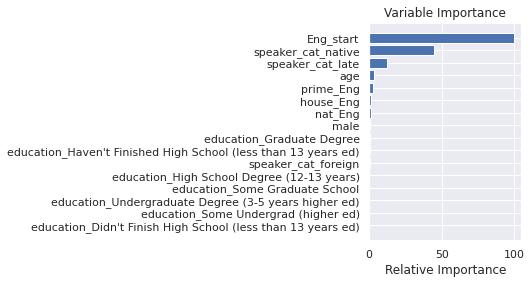

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm

clfsvm = svm.SVC(kernel='linear', C=1, random_state=42)
scorez = cross_val_score(clfsvm, X, y, cv=5)
scorez

array([nan, nan, nan, nan, nan])

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

In [ ]:
c2=c.sample(n=10000)

In [ ]:
y1=c2['elogit']
X1=c2[['gender','prime_Eng','nat_Eng','education','age','house_Eng','Eng_start']]
v=pd.get_dummies(c2[['speaker_cat','education']])
# m=pd.get_dummies(c['natlangs'])
g=pd.get_dummies(c2['gender'], drop_first=True)

# df3.reset_index(drop=True, inplace=True)
# df3.reset_index(drop=True, inplace=True)
X1 = X1.drop(['gender'], axis =1).merge(g,left_index=True, right_index=True)
X1 = X1.drop(['education'], axis =1).merge(v,left_index=True, right_index=True)
# X = X.drop(['natlangs'], axis =1).merge(m,left_index=True, right_index=True)


# X=pd.concat([X, pd.get_dummies(c['gender'], drop_first=True)])

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear',C=1.0,max_iter=-1)
X1 = X1['elogit'].values.reshape(-1,1)
for i in X1:
  X1[i] = X1[i].values.reshape(-1,1)
  regressor.fit(X1[i].values, y1)
  print(regressor.score(X1,y1))

ValueError: ignored

In [ ]:
print(regressor.score(X1,y1))

0.26108811096464446


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm

clfsvm = svm.SVC(kernel='linear', C=2, random_state=1)
scorez = cross_val_score(clfsvm, X1.values, y1, cv=2)
scorez

array([nan, nan])

In [ ]:
X1.isnull().sum()

prime_Eng                                                         0
nat_Eng                                                           0
age                                                               0
house_Eng                                                         0
Eng_start                                                         0
male                                                              0
speaker_cat_foreign                                               0
speaker_cat_late                                                  0
speaker_cat_native                                                0
education_Didn't Finish High School (less than 13 years ed)       0
education_Graduate Degree                                         0
education_Haven't Finished High School (less than 13 years ed)    0
education_High School Degree (12-13 years)                        0
education_Some Graduate School                                    0
education_Some Undergrad (higher ed)            

In [ ]:
"https://www.sciencedirect.com/science/article/pii/S0010027718300994
http://l3atbc-public.s3.amazonaws.com/pub_pdf3s/JK_Hartshorne_JB_Tenenbaum_S_Pinker_2018.pdf3
https://osf.io/pyb8s/
http://web.archive.org/web/20180217125721/http://archive.gameswithwords.org/WhichEnglish/
https://osf.io/pyb8s/wiki/home/
https://medium.com/@chacon/mit-scientists-prove-adults-learn-language-to-fluency-nearly-as-well-as-children-1de888d1d45f"

In an study published last year (preprint Pdf3 here), three Boston-area professors analyzed data from more than 600,000 people who took an online English grammar quiz. In addition to the participants’ answers, the dataset includes their native languages, the age they began learning English, the countries they’ve lived in, gender, age, and more. Related: Scott Chacon's analysis of the data, and what it might mean for older learners. [h/t George McIntire]